Matlab Function to convert:
```
function isChoiceCorrect = simulate_oneDecision(num_decisions, prob)
%{
simulate one decision given the number of times to try and the probability
returns 1 or 0 depending on the outcome
%}
for i = 1:num_decisions
    if rand <= prob
        isCorrect(i) = 1;
    else
        isCorrect(i) = 0;
    end
end

N_correct = sum(isCorrect);
N_incorrect = num_decisions - sum(isCorrect);

if N_correct > N_incorrect
    isChoiceCorrect = 1;
elseif N_correct < N_incorrect
    isChoiceCorrect = 0;
elseif N_correct == N_incorrect
    isChoiceCorrect = rand <= 0.5;
end
```

In [1]:
import numpy as np

In [2]:
def simulate_oneDecision(num_decisions, prob):
    '''
    simulate one decision given the number of times to try and the probability
    returns 1 or 0 depending on the outcome
    '''
    isCorrect = [0] * num_decisions
    for i in range(num_decisions):
        if np.random.random() <= prob:
            isCorrect[i] = 1;
    #print(isCorrect)
    N_correct = sum(isCorrect)
    N_incorrect = num_decisions - sum(isCorrect)

    if N_correct > N_incorrect:
        isChoiceCorrect = 1
    elif N_correct < N_incorrect:
        isChoiceCorrect = 0
    elif N_correct == N_incorrect:
        isChoiceCorrect = np.random.random() <= 0.5
    return isChoiceCorrect

```
function avg_acc = simulate_manyDecisions(num_replications, num_decisions, prob)
, 
%{
simulate a decision many times given
number or replications, number of decisions, and probability
returns an average of the results
%}
for replication = 1:num_replications
    isChoiceCorrect(replication) = simulate_oneDecision(num_decisions, prob);
end
avg_acc = mean(isChoiceCorrect);
```

In [3]:
def simulate_manyDecisions(num_replications, num_decisions, prob):
    '''
    simulate a decision many times given
    number or replications, number of decisions, and probability
    returns an average of the results
    '''
    isChoiceCorrect = [0] * num_replications
    for replication in range(num_replications):
        isChoiceCorrect[replication] = simulate_oneDecision(num_decisions, prob)
    avg_acc = np.mean(isChoiceCorrect)
    return avg_acc

```
num_decisions = 100;
num_replications = 1000;
probability_vals = [0.5:0.05:0.8];

for i = 1:length(probability_vals)
    prob = probability_vals(i);
    avg_acc(i) = simulate_manyDecisions(num_replications, num_decisions, prob);
end


figure(1); clf; hold on;
plot(probability_vals, avg_acc)
xlabel('Proportion of dots moving in the correct direction (prob)')
ylabel('Probability of correct answer')
```

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

[ 0.5   0.55  0.6   0.65  0.7   0.75  0.8 ]


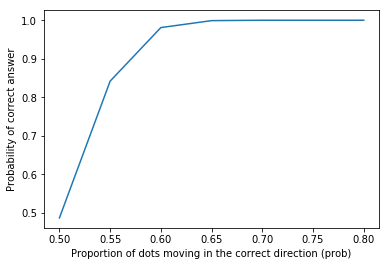

In [5]:
num_decisions = 100
num_replications = 1000
probability_vals = np.arange(0.5,0.8,0.05)
print(probability_vals)
avg_acc = [0] * len(probability_vals)

for i, prob in enumerate(probability_vals):
    avg_acc[i] = simulate_manyDecisions(num_replications, num_decisions, prob)

plt.plot(probability_vals, avg_acc)
plt.xlabel('Proportion of dots moving in the correct direction (prob)')
plt.ylabel('Probability of correct answer')